In [ ]:
!pip install -r c:/dev/nlp/requirements.yml

print(os.getcwd())

In [ ]:
pip install spacy && python -m spacy download en_core_web_sm

In [93]:
import importlib
import RobertaTopicModelling


importlib.reload(RobertaTopicModelling)


<module 'RobertaTopicModelling' from 'c:\\dev\\nlp\\RobertaTopicModelling.py'>

In [42]:
import os
def get_all_folders(path):
    return [os.path.join(path, name) for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))]
            
def get_all_files(path):
    return [os.path.join(path, file) for file in os.listdir(path)
            if os.path.isfile(os.path.join(path, file))]

In [28]:
text_files = []
candidate_folders = get_all_folders("C:/dev/nlp/exam")
for folder in candidate_folders:
    text_paths = get_all_files(folder)
    text_files.append(text_paths)

In [ ]:

from tqdm import tqdm

# Initialize DataFrame with new column for similarity score
df = pd.DataFrame(columns=['Year', 
                           'Candidate', 
                           'Neuroticism',
                           'Extroversion',
                           'Openness',
                           'Agreeableness', 
                           'Conscientiousness',
                           'Topic',
                           'Similarity_Score'])  # Added similarity score

# Initialize models
TM = RobertaTopicModelling.PoliticalTopicModeller()
Personality = RobertaTopicModelling.PersonalityModeller()

# Count total files for overall progress tracking
total_files = sum(len(candidate) for candidate in text_files)
processed_files = 0

# Create a single main progress bar
with tqdm(total=total_files, desc="Overall Progress", unit="file") as pbar:
    
    for candidate_idx, candidate in enumerate(text_files):
        print(f"\nProcessing candidate group {candidate_idx+1}/{len(text_files)}")
        
        for txt_path in candidate:
            # Update progress for each file
            file_name = txt_path.split('/')[-1]  # Extract just the filename for display
            pbar.set_description(f"Processing {file_name}")
            
            # Run topic modeling
            output = TM.run_topic_modelling(txt_path)
            
            # Collect results with similarity scores
            results = []
            for c, years in output.items():
                for year, topics in years.items():
                    for topic, data in topics.items():
                        # Now topics contains text and avg_similarity
                        results.append((topic, data["text"], data["avg_similarity"]))
            
            # Add a progress indicator for topics
            print(f"  Processing {len(results)} topics from {file_name}")
            
            for topic_idx, (topic, text, similarity) in enumerate(results):
                # Print current topic progress
                print(f"  Topic {topic_idx+1}/{len(results)}: {topic} (Similarity: {similarity:.2f}%)")
                
                # Get personality traits
                trait_dict = Personality.get_results(text)
                
                # Add rows to DataFrame with progress indicator for chunks
                for chunk_idx, chunk in enumerate(trait_dict):
                    # Print periodic updates for chunks to avoid too much output
                    if chunk_idx % 5 == 0 or chunk_idx == len(trait_dict) - 1:
                        print(f"    Processing chunk {chunk_idx+1}/{len(trait_dict)}", end="\r")
                    
                    # Append row with similarity score
                    df.loc[len(df)] = {
                        'Year': TM.year,
                        'Candidate': TM.current_candidate, 
                        'Neuroticism': chunk['Neuroticism'],
                        'Extroversion': chunk['Extroversion'],
                        'Openness': chunk['Openness'],
                        'Agreeableness': chunk['Agreeableness'],
                        'Conscientiousness': chunk['Conscientiousness'],
                        'Topic': topic,
                        'Similarity_Score': similarity  # Add similarity score
                    }
                
                print()  # New line after each topic's chunks are processed
            
            # Update the main progress bar
            processed_files += 1
            pbar.update(1)

print("\nProcessing complete!")
print(f"DataFrame has {len(df)} rows.")

# Summary of topics by similarity score
print("\nTopic Similarity Summary:")
topic_summary = df.groupby('Topic')['Similarity_Score'].mean().sort_values(ascending=False)
for topic, avg_similarity in topic_summary.items():
    print(f"{topic}: {avg_similarity:.2f}%")

In [97]:
#scale
from sklearn.preprocessing import StandardScaler

# Columns to scale
columns_to_scale = ['Neuroticism',	'Extroversion',	'Openness',	'Agreeableness',	'Conscientiousness']

# Apply scaler only to specified columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df['bold_level'] = df.apply(Personality.calculate_bold, axis = 1)


In [100]:

path = 'c:/dev/nlp/american_presidents_since_nixon.csv'

presi_party = pd.read_csv(path)


In [ ]:
for i, candidate in enumerate(df['Candidate'].values):
    df.loc[i,'party'] = str(presi_party.loc[presi_party['President'] == candidate]['Party'].values[0])

In [113]:
def general_barplot(data, x_col, y_col):
    print(f"y_col: {y_col}, type: {type(y_col)}")


    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


    plt.title(f'{str(y_col)} Scores by {str(x_col)}')
    plt.ylabel(str(y_col))
    plt.xticks(rotation=45)
    plt.legend([],[], frameon=False)  # Hide the redundant legend

    plt.tight_layout()
    plt.show()
    plt.close()

    return

def barplot_across_candidates():
    y_values = ['Neuroticism', 'Extroversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'bold_level']

    for y_val in y_values:

        general_barplot(df, 'Candidate', y_val)
    return

def bar_plot_across_parties():

    y_values = ['Neuroticism', 'Extroversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'bold_level']


    for y_val in y_values:

        general_barplot(df, 'party', str(y_val))
    return

y_col: Neuroticism, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


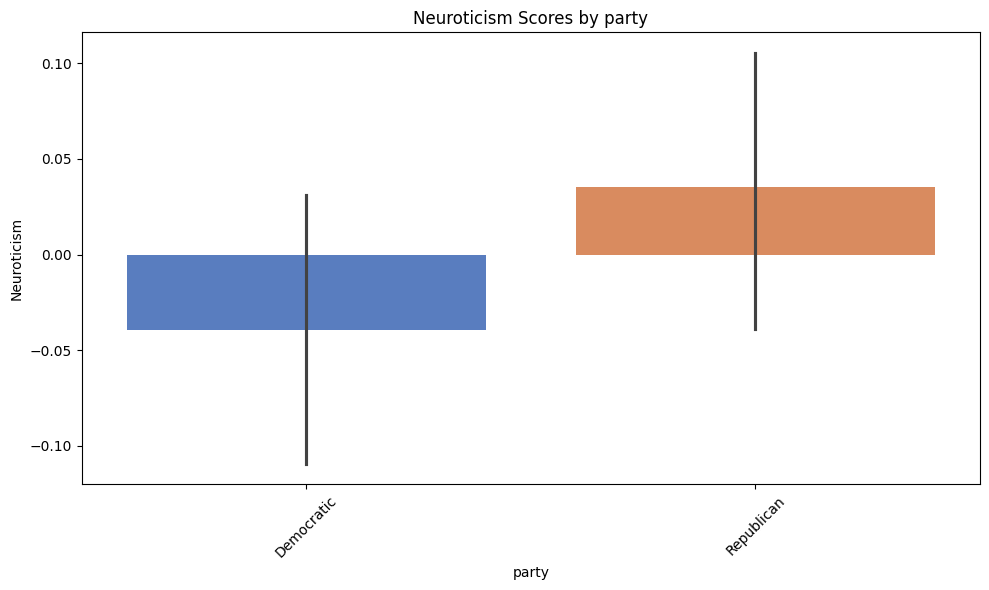

y_col: Extroversion, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


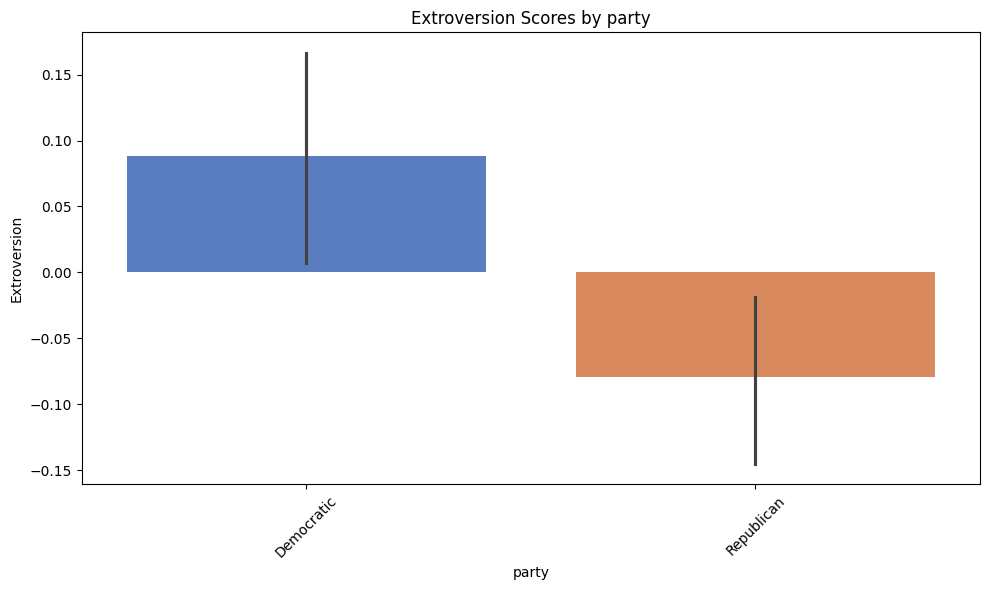

y_col: Openness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


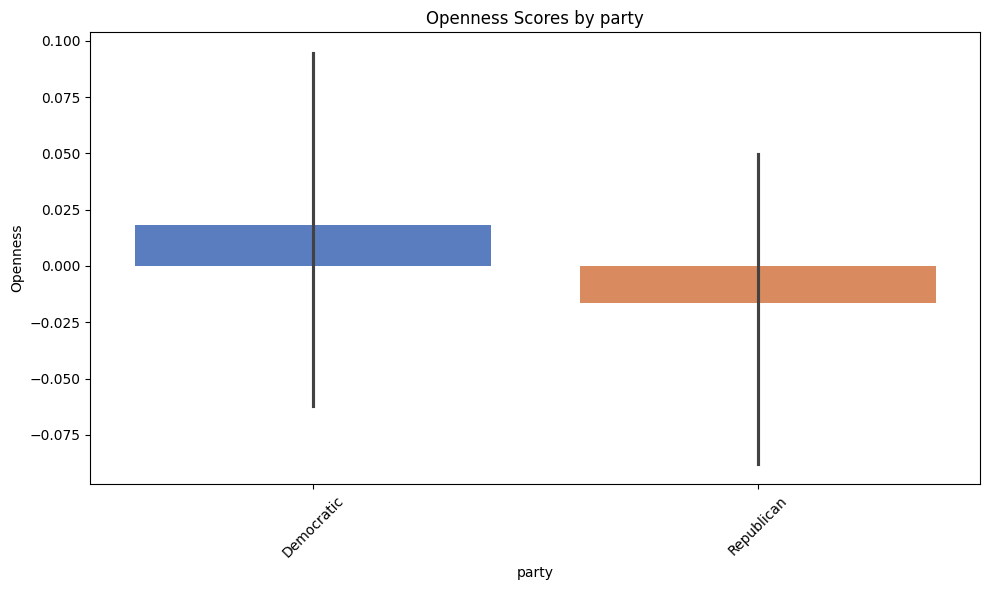

y_col: Agreeableness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


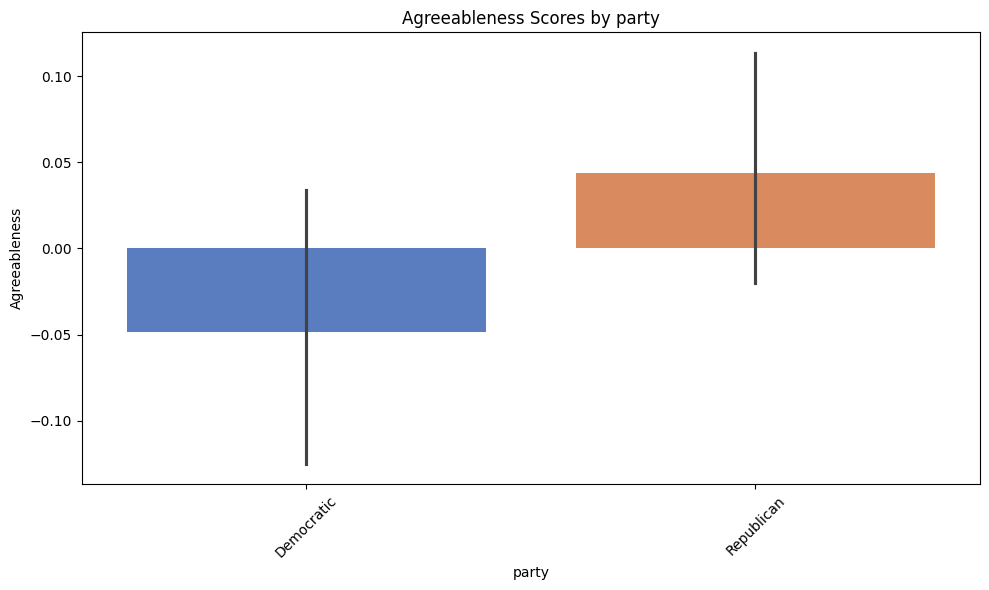

y_col: Conscientiousness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


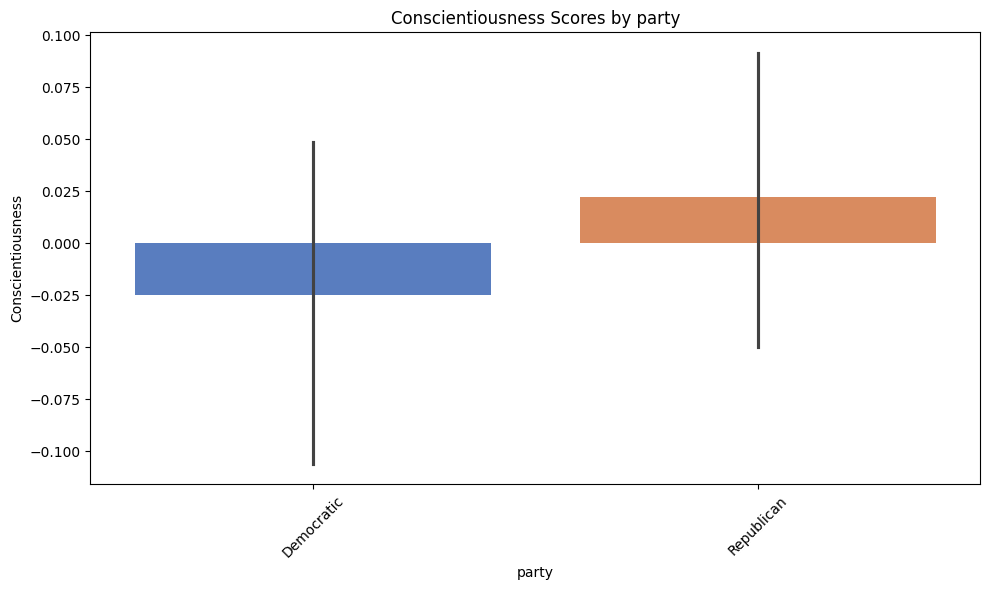

y_col: bold_level, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\1673217793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


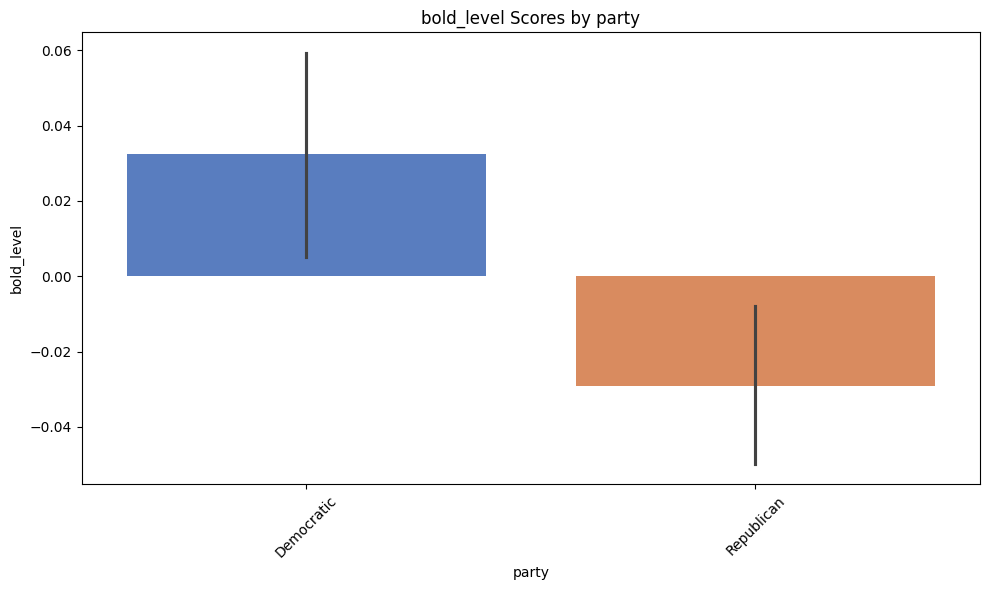

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
bar_plot_across_parties()

y_col: Neuroticism, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


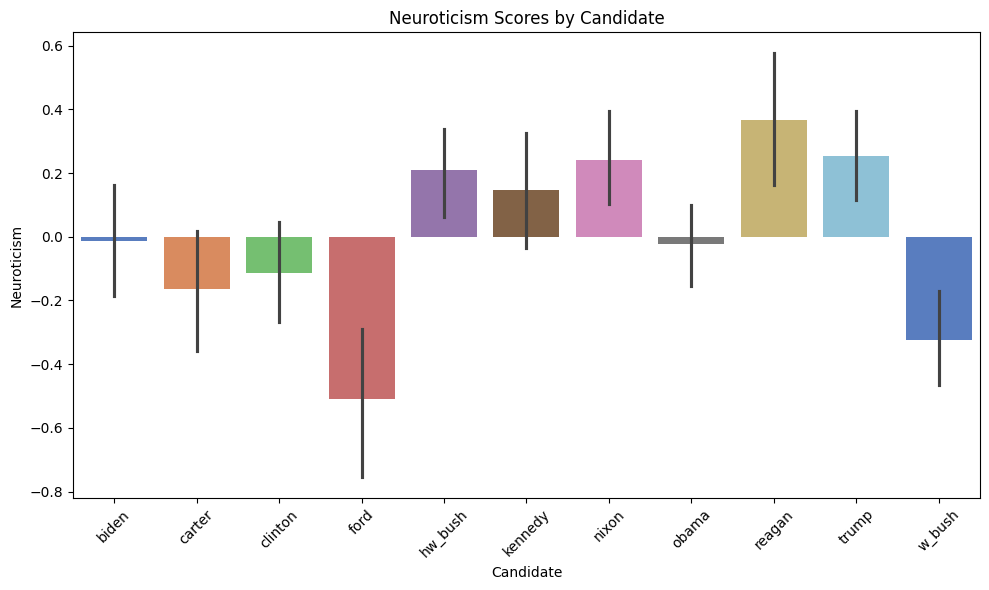

y_col: Extroversion, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


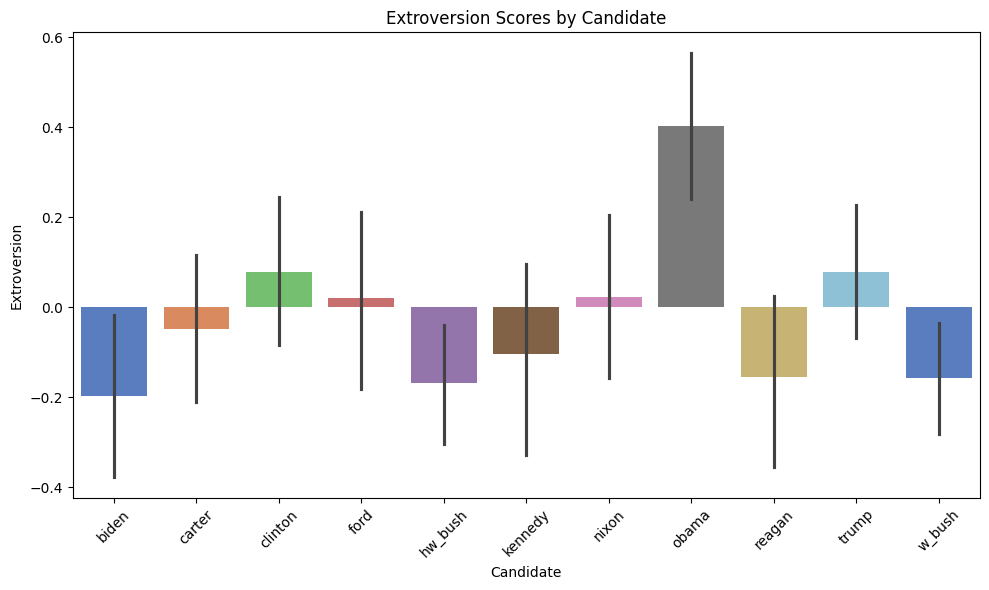

y_col: Openness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


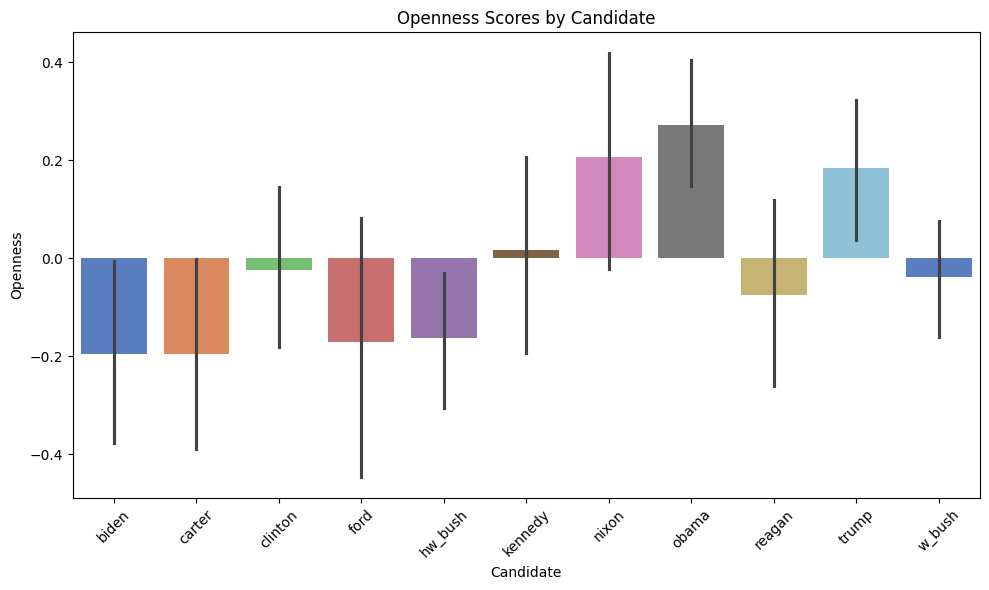

y_col: Agreeableness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


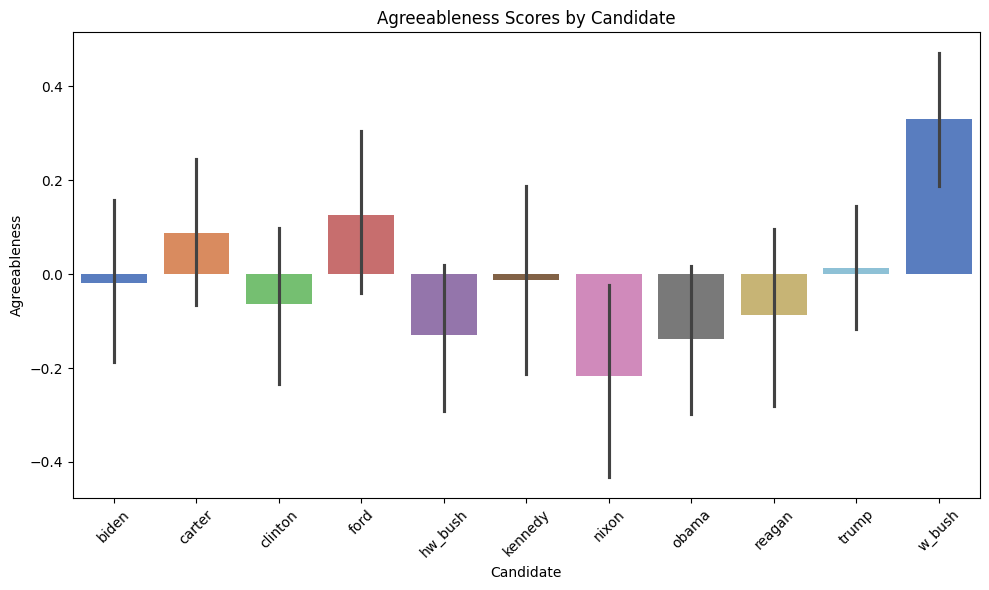

y_col: Conscientiousness, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


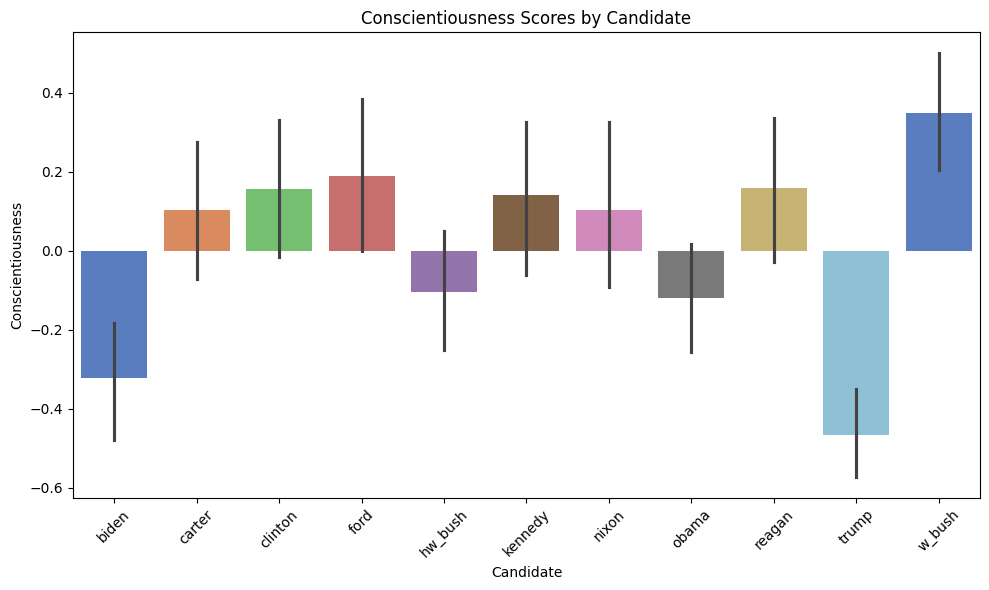

y_col: bold_level, type: <class 'str'>


C:\Users\runet\AppData\Local\Temp\ipykernel_9636\3568307167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=str(x_col), y=str(y_col), errorbar=('ci', 95), palette='muted')


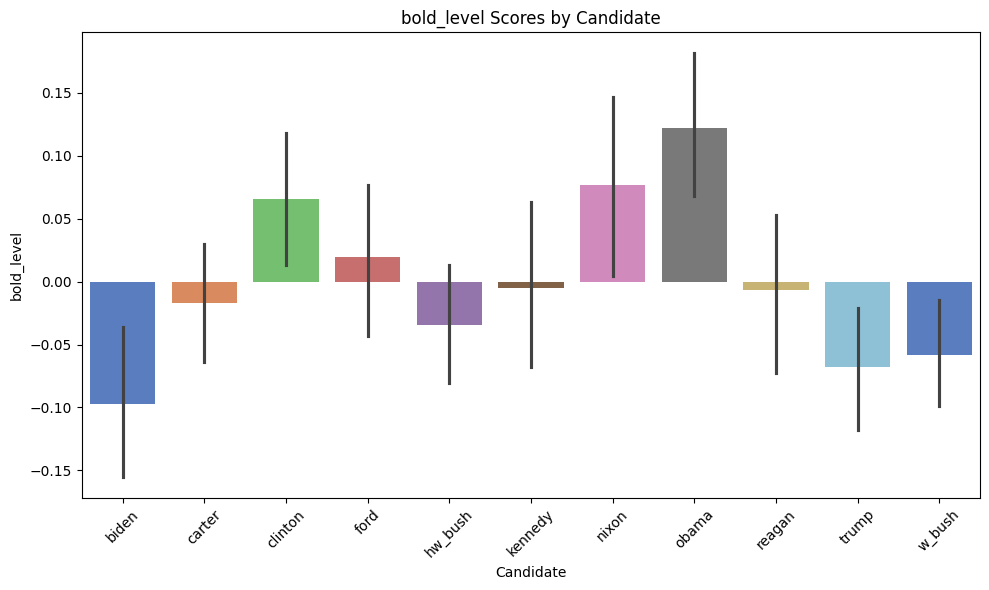

In [114]:
barplot_across_candidates()



In [116]:
df.to_csv('C:/dev/nlp/PersonalityData.csv')